By <b>Raiyan Abdul Baten</b>

University of Rochester, NY, USA 

Mail: raiyanabdulbaten@gmail.com

# Linear Regression Basics
## Implementations and Cheat Sheets

This page documents summary theories and implementations of basic linear regression algorithms. In particular, it covers:

- Simple linear regression
- Multivariate linear regression
- Polynomial linear regression with validation-set based model complexity selection

In [1]:
import pandas as pd
import os
import numpy as np
import re
import csv
from IPython.display import display, Math, Latex
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
%matplotlib inline

def load_csv_data(folder_name, file_name, dtype_dict=None):
    csv_path = os.path.join(folder_name, file_name+".csv")
    return pd.read_csv(csv_path, dtype=dtype_dict)

# Loading data

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, \
              'sqft_living15':float, 'grade':int, 'yr_renovated':int, \
              'price':float, 'bedrooms':float, 'zipcode':str, \
              'long':float, 'sqft_lot15':float, 'sqft_living':float, \
              'floors':str, 'condition':int, 'lat':float, 'date':str, \
              'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
df = load_csv_data("data","kc_house_data",dtype_dict)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


# Simple Linear Regression

Regression model:

\begin{equation}
y_i = w_0+w_1x_i+\epsilon_i
\end{equation}

The residual sum of squares, RSS, is given by:

\begin{equation}
 \text{RSS}(w_0,w_1) = \sum_{i=1}^{N}(y_i-(w_0+w_1x_i))^2
\end{equation}


The parameters $w_0$ and $w_1$ can be found by minimizing the RSS:
\begin{equation}
\operatorname*{argmin}_{w_0,w_1} \sum_{i=1}^{N}(y_i-(w_0+w_1x_i))^2
\end{equation}

Taking the derivatives with respect to $w_0$ and $w_1$:

\begin{equation}
\nabla \text{RSS}(w_0,w_1) = \begin{bmatrix}-2\sum_{i=1}^{N}(y_i-(w_0+w_1x_i)) \\ -2\sum_{i=1}^{N}(y_i-(w_0+w_1x_i))x_i \end{bmatrix} 
\end{equation}

To find the closed form solutions, set the gradients to 0:

\begin{equation}
\begin{bmatrix}-2\sum_{i=1}^{N}(y_i-(\hat{w_0}+\hat{w_1}x_i)) \\ -2\sum_{i=1}^{N}(y_i-(\hat{w_0}+\hat{w_1}x_i))x_i \end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix} 
\end{equation}
\begin{equation}
\hat{w_0} = \frac{(\sum_{i=1}^{N}y_i)(\sum_{i=1}^{N}x_i^2) -(\sum_{i=1}^{N}x_i)(\sum_{i=1}^{N}x_iy_i)}{N(\sum_{i=1}^{N}x_i^2)-(\sum_{i=1}^{N}x_i)^2}
\end{equation}
\begin{equation}
\hat{w_1} = \frac{N(\sum_{i=1}^{N}x_iy_i)-(\sum_{i=1}^{N}x_i)(\sum_{i=1}^{N}y_i)}{N(\sum_{i=1}^{N}x_i^2)-(\sum_{i=1}^{N}x_i)^2}
\end{equation}


Using Gradient descent:

while not converged:
\begin{equation}
\begin{bmatrix}w_0^{(t+1)} \\ w_1^{(t+1)}\end{bmatrix} <= \begin{bmatrix}w_0^{(t)} \\ w_1^{(t)}\end{bmatrix} + 2 \eta \begin{bmatrix}\sum_{i=1}^{N}(y_i-(w_0^{(t)}+w_1^{(t)}x_i)) \\ \sum_{i=1}^{N}(y_i-(w_0^{(t)}+w_1^{(t)}x_i))x_i \end{bmatrix} 
\end{equation}

In [5]:
def simple_linear_regression(feature, target):
    N=feature.size
    sum_x = np.sum(feature)
    sum_y = np.sum(target)
    sum_x2 = np.dot(feature,feature)
    sum_xy = np.dot(feature,target)
    intercept = float(sum_y*sum_x2-sum_x*sum_xy)/float(N*sum_x2-(sum_x)**2)
    slope = float(N*sum_xy-sum_x*sum_y)/float(N*sum_x2-(sum_x)**2)
    return intercept, slope

In [6]:
def get_regression_predictions(input_value, intercept, slope):
    predicted_output = intercept+slope*input_value
    return(predicted_output)

In [7]:
w0,w1 = simple_linear_regression(df["sqft_living"],df["price"])
print("Intercept: "+str(w0))
print("Slope: "+str(w1))
y_hat = get_regression_predictions(2650,w0,w1)
print("Prediction for 2650 sqft input: "+str(y_hat))

Intercept: -43580.743094474085
Slope: 280.6235678974483
Prediction for 2650 sqft input: 700071.711833764


#### Verify with Scikit Learn

In [9]:
X= df["sqft_living"].values.reshape(-1, 1)
Y= df["price"].values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
regr.intercept_

array([-43580.74309447])

In [11]:
regr.coef_

array([[280.6235679]])

# Multi-Regression: Multiple features

#### Regression model

\begin{equation}
\mathbf{y}=\mathbf{X}\mathbf{w}+\mathbf{\epsilon},
\end{equation}
where $\mathbf{y}\in \mathbb{R}^{N\times 1}, \mathbf{X}\in \mathbb{R}^{N\times p}, \mathbf{w}\in \mathbb{R}^{p\times 1},\mathbf{\epsilon}\in \mathbb{R}^{N\times 1}$


#### Residual sum of squares

\begin{equation}
 \text{RSS}(\mathbf{w}) = (\mathbf{y}-\mathbf{\hat{y}})^\text{T}(\mathbf{y}-\mathbf{\hat{y}}) = (\mathbf{y}-\mathbf{X}\mathbf{w})^\text{T}(\mathbf{y}-\mathbf{X}\mathbf{w})
\end{equation}


#### Taking the gradient
\begin{equation}
 \nabla \text{RSS}(\mathbf{w}) = \nabla ((\mathbf{y}-\mathbf{X}\mathbf{w})^\text{T}(\mathbf{y}-\mathbf{X}\mathbf{w})) = -2\mathbf{X}^\text{T}(\mathbf{y}-\mathbf{X}\mathbf{w})
\end{equation}

#### Finding closed solutions
\begin{equation}
 \nabla \text{RSS}(\mathbf{w}) = 0 \\
\mathbf{\hat{w}} = (\mathbf{X}^{\text{T}}\mathbf{X})^{-1}\mathbf{X}^{\text{T}}\mathbf{y}
\end{equation}


#### Using Gradient Descent

init $t=1, \mathbf{w}^{(1)}=0$ or randomly or smartly

while $||\nabla \text{RSS}(\mathbf{w}^{(t)})||>$threshold:

\begin{equation}
\mathbf{w}^{(t+1)} <= \mathbf{w}^{(t)} +2\eta\mathbf{X}^\text{T}(\mathbf{y}-\mathbf{X}\mathbf{w}^{(t)})\\
\end{equation}

In [12]:
def predict_outcome(feature_matrix, weights):
    predictions = np.matmul(feature_matrix,weights)
    return(predictions)

In [13]:
def compute_RSS(X,y,w):
    RSS = np.matmul(np.transpose(y-predict_outcome(X,w)),y-predict_outcome(X,w))
    return RSS

In [14]:
def regression_gradient_descent(feature_matrix, target, initial_weights, step_size, tolerance):
    converged = False
    weights = np.array(initial_weights)
    while not converged:
        gradient_RSS = -2*np.matmul(np.transpose(feature_matrix),target-np.matmul(feature_matrix,weights))
        weights = weights - step_size*gradient_RSS
        # print(np.linalg.norm(gradient_RSS))
        if np.linalg.norm(gradient_RSS) < tolerance:
            converged = True
    return(weights)

In [15]:
def regression_closed_form(feature_matrix, target):
    weights = np.matmul(np.linalg.inv(np.matmul(np.transpose(feature_matrix),feature_matrix)),\
                        np.matmul(np.transpose(feature_matrix),target))
    return(weights)

In [16]:
def dataframe_prepare(dataframe,features,target):
    dataframe["constant"]=1
    one_padded_features=["constant"]
    one_padded_features.extend(features)
    X = dataframe[one_padded_features].values
    Y = dataframe[target].values
    return X,Y

In [17]:
X,Y=dataframe_prepare(df,['sqft_living', 'sqft_living15'],['price'])
initial_weights = np.array([[-100000.], [1.], [1.]])
step_size = 1e-12
tolerance = 1e7
weights = regression_gradient_descent(X, Y, initial_weights, step_size, tolerance)
print("The weights from gradient descent are: ")
print(weights)
weights_closed = regression_closed_form(X, Y)
print("The weights from closed form solution are: ")
print(weights_closed)

The weights from gradient descent are: 
[[-9.99999581e+04]
 [ 2.42236995e+02]
 [ 6.85301426e+01]]
The weights from closed form solution are: 
[[-9.88630845e+04]
 [ 2.42215593e+02]
 [ 6.80410303e+01]]


#### Verify with Scikit Learn

In [18]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
regr.intercept_

array([-98863.08452929])

In [20]:
regr.coef_

array([[  0.        , 242.21559297,  68.04103034]])

# Polynomial Regression: Selection of Model Complexity

Plot RSS vs model complexity (max degree of polynomial) and pick the complexity that gives the minimum RSS. 

In [21]:
def polynomial_dataframe(feature, degree):
    poly_dataframe = pd.DataFrame()
    poly_dataframe["power_1"] = feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

Best RSS on validation set is [[6.20045619e+14]], corresponding to degree 5
RSS on test set with degree 5: [[1.35567153e+14]]


Text(0,0.5,'RSS')

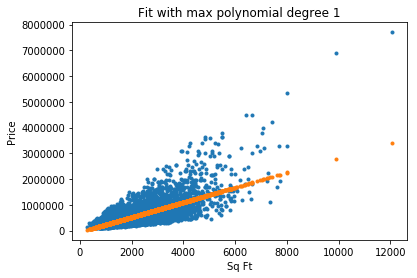

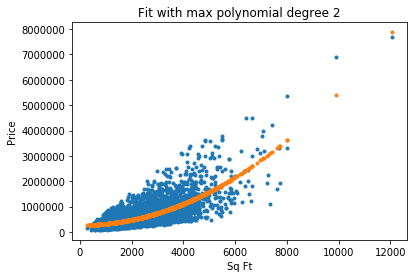

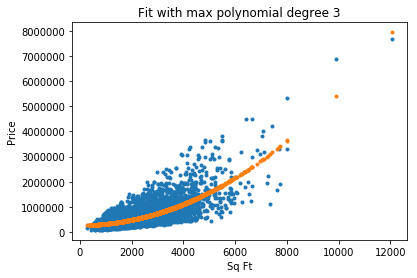

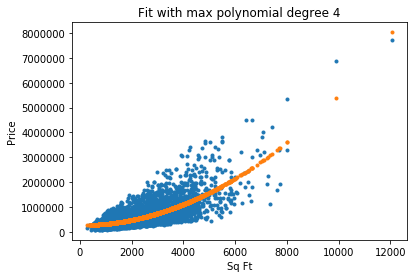

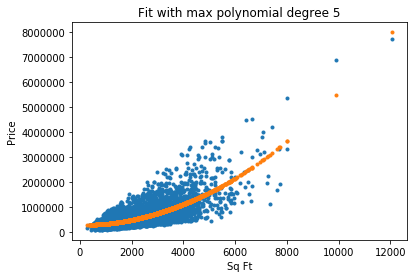

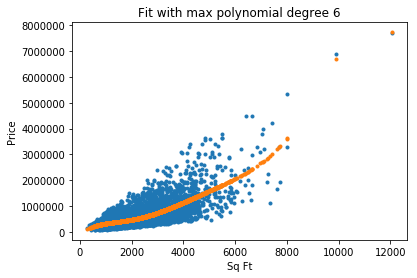

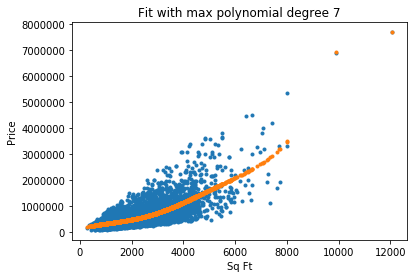

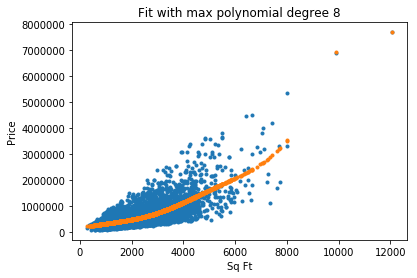

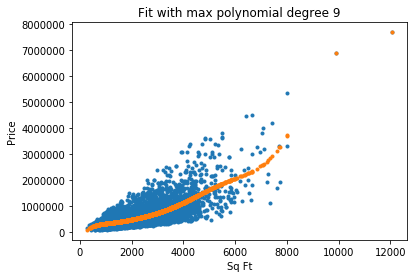

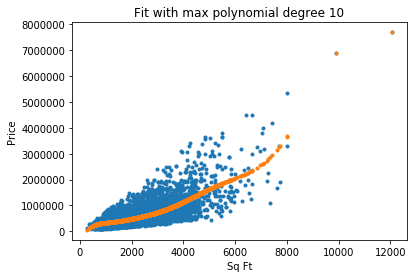

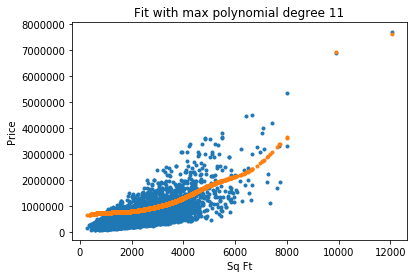

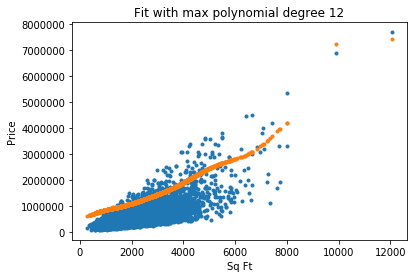

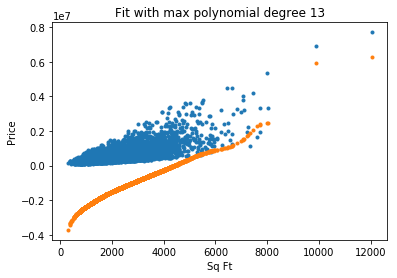

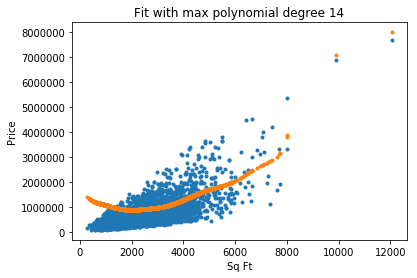

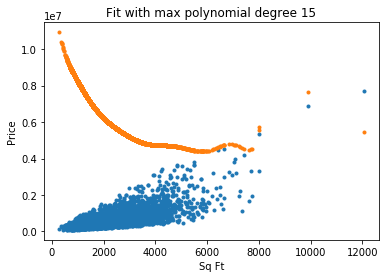

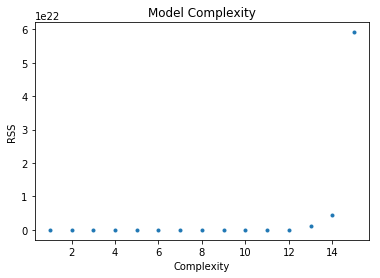

In [22]:
df_wk3_train = load_csv_data("data","wk3_kc_house_train_data",dtype_dict)
df_wk3_valid = load_csv_data("data","wk3_kc_house_valid_data",dtype_dict)
df_wk3_test = load_csv_data("data","wk3_kc_house_test_data",dtype_dict)

#for saving the learned weights and RSS values
weights_list=[]
RSS=[]

for degree in range(1,16): #degrees from 1 to 15
    #generate polynomial features with upto 'degree' degrees
    poly_train = polynomial_dataframe(df_wk3_train["sqft_living"], degree) 
    poly_train["price"]=df_wk3_train["price"]
    features = ["power_"+str(i) for i in range(1,degree+1)]        
    X_train,Y_train=dataframe_prepare(dataframe=poly_train,\
                                      features=features,target=['price'])
    
    #learn weights on training set
    weights = regression_closed_form(X_train, Y_train)
    weights_list.append(weights)
    
    plt.figure(degree)
    plt.plot(poly_train['power_1'],poly_train["price"],'.',
    poly_train['power_1'], predict_outcome(X_train,weights),'.')
    plt.title("Fit with max polynomial degree "+str(degree))
    plt.xlabel("Sq Ft")
    plt.ylabel("Price")
    
    #find RSS on validation set
    poly_valid = polynomial_dataframe(df_wk3_valid["sqft_living"], degree)
    poly_valid["price"]=df_wk3_valid["price"]     
    X_valid,Y_valid=dataframe_prepare(dataframe=poly_valid,\
                                      features=features,target=['price'])
    RSS_temp = compute_RSS(X_valid,Y_valid,weights)
    RSS.append(RSS_temp)
    
#find best RSS on validation set
val, idx = min((val, idx) for (idx, val) in enumerate(RSS))
print("Best RSS on validation set is "+str(val)+", corresponding to degree "+str(idx+1))

#final run on test set    
poly_test = polynomial_dataframe(df_wk3_test["sqft_living"], idx+1) #using the degree with best RSS
poly_test["price"]=df_wk3_test["price"]  
features = ["power_"+str(i) for i in range(1,idx+2)]  
X_test,Y_test=dataframe_prepare(dataframe=poly_test,\
                                features=features,target=['price'])
RSS_test =  compute_RSS(X_test,Y_test,weights_list[idx])
print("RSS on test set with degree "+str(idx+1)+": "+str(RSS_test))

plt.figure(16)
plt.plot(range(1,16),[RSS[i][0][0] for i in range(0,15)],'.')
plt.title("Model Complexity")
plt.xlabel("Complexity")
plt.ylabel("RSS")
